# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [15]:
env = gym.make('Pendulum-v0')
env.seed(0)
state = env.reset()
low = env.action_space.low[0]
high = env.action_space.high[0]
action_space = 100
state_space = 3
possible_action = np.linspace(low, high, action_space, endpoint=False)

/home/oxygen/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [16]:
possible_action

array([-2.  , -1.96, -1.92, -1.88, -1.84, -1.8 , -1.76, -1.72, -1.68,
       -1.64, -1.6 , -1.56, -1.52, -1.48, -1.44, -1.4 , -1.36, -1.32,
       -1.28, -1.24, -1.2 , -1.16, -1.12, -1.08, -1.04, -1.  , -0.96,
       -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68, -0.64, -0.6 ,
       -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32, -0.28, -0.24,
       -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,  0.08,  0.12,
        0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,  0.44,  0.48,
        0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,  0.8 ,  0.84,
        0.88,  0.92,  0.96,  1.  ,  1.04,  1.08,  1.12,  1.16,  1.2 ,
        1.24,  1.28,  1.32,  1.36,  1.4 ,  1.44,  1.48,  1.52,  1.56,
        1.6 ,  1.64,  1.68,  1.72,  1.76,  1.8 ,  1.84,  1.88,  1.92,
        1.96])

Before running the next code cell, familiarize yourself with the code in **Step 2** and **Step 3** of this notebook, along with the code in `dqn_agent.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Define a neural network architecture in `model.py` that maps states to action values.  This file is mostly empty - it's up to you to define your own deep Q-network!
- Finish the `learn` method in the `Agent` class in `dqn_agent.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `dqn_agent.py` and `model.py`, run the code cell below.  (_If you end up needing to make multiple changes and get unexpected behavior, please restart the kernel and run the cells from the beginning of the notebook!_)

You can find the solution files, along with saved model weights for a trained agent, in the `solution/` folder.  (_Note that there are many ways to solve this exercise, and the "solution" is just one way of approaching the problem, to yield a trained agent._)

In [17]:
env.observation_space

Box(3,)

In [18]:
#just for rendering 
for _ in range(1):
    state = env.reset()
    while True:
        env.render()
        action = env.action_space.sample()
        print(action)
        next_state, reward, done, info = env.step(action)
        print('\rreward {}'.format(reward), end= ' ')
        state = next_state
        if done:
            state = env.reset()
            break
env.close()

[1.0719751]
reward -0.7138782562725786 [1.3077943]
reward -0.730484143680905 [1.6295727]
reward -0.9262814728749272 [-1.8971671]
reward -1.3512418901407548 [1.6487473]
reward -1.7271275522760159 [1.4776537]
reward -2.5945028887534636 [-0.8181534]
reward -3.8297750301957563 [-1.791527]
reward -5.128363167611662 [0.32363826]
reward -6.546044310315947 [0.7376361]
reward -8.622016290699792 [1.4331238]
reward -11.092932115422125 [1.2423447]
reward -13.93492124119721 [-0.5933098]
reward -14.424179734940019 [-1.2659587]
reward -12.056094678446788 [-1.7325932]
reward -9.606041152269707 [-1.9938042]
reward -7.302507664988239 [-0.10739902]
reward -5.327335251630833 [0.98544157]
reward -3.976843426101604 [-0.69249815]
reward -3.0140941160696086 [0.00994194]
reward -2.1529321331217592 [0.8928843]
reward -1.595766895672403 [0.1685168]
reward -1.2531479136657868 [-0.969451]
reward -1.0235283826531607 [1.0369396]
reward -0.9390331645440195 [-0.8753002]
reward -0.9854473648280974 [-0.30863008]
reward 

In [8]:
def in_range(val , low, high):
    if val >= low and val < high:
        return True
    else:
        return False

def range_setter(val, possible_action):
    count = 0
    if val < possible_action[0]:
        return -1
    for i in range(len(possible_action)):
        if i < len(possible_action) - 1:
            #print(possible_action[i], possible_action[i+1])
            if in_range(val,possible_action[i], possible_action[i+1]) == True:
                return count
            else:
                count+= 1
                continue
    return count

In [9]:
for i in range(10):
    g = random.random()
    print(g, range_setter(g, possible_action))

0.07400465861560745 51
0.9412306705637516 73
0.9250266040341009 73
0.596897055089912 64
0.520861668779948 63
0.5351635761614816 63
0.8410209581412411 71
0.39838472776981515 59
0.25368620918336926 56
0.40564452955264296 60


### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Episode 100	Average Score: -634.90 	Eps_val 0.61
Episode 200	Average Score: -755.00 	Eps_val 0.37
Episode 300	Average Score: -701.10 	Eps_val 0.22
Episode 400	Average Score: -564.14 	Eps_val 0.13
Episode 500	Average Score: -565.20 	Eps_val 0.08
Episode 600	Average Score: -561.54 	Eps_val 0.05
Episode 700	Average Score: -572.27 	Eps_val 0.03
Episode 800	Average Score: -611.89 	Eps_val 0.02
Episode 900	Average Score: -574.31 	Eps_val 0.01
Episode 1000	Average Score: -557.22 	Eps_val 0.01
Episode 1100	Average Score: -393.32 	Eps_val 0.01
Episode 1200	Average Score: -301.60 	Eps_val 0.01
Episode 1300	Average Score: -270.22 	Eps_val 0.01
Episode 1400	Average Score: -230.71 	Eps_val 0.01
Episode 1500	Average Score: -232.87 	Eps_val 0.01
Episode 1600	Average Score: -203.10 	Eps_val 0.01
Episode 1700	Average Score: -194.01 	Eps_val 0.01
Episode 1800	Average Score: -180.07 	Eps_val 0.01
Episode 1900	Average Score: -188.15 	Eps_val 0.01
Episode 2000	Average Score: -162.64 	Eps_val 0.01


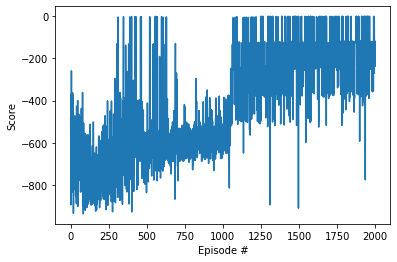

In [19]:
from dqn_agent import Agent
agent = Agent(state_size=state_space, action_size=action_space, possible_action=possible_action, seed=0)

def dqn(n_episodes=2000, max_t=100, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).reshape(1,)
            #print(action)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward*10, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f} \tEps_val {:.2f}'.format(i_episode, np.mean(scores_window), eps), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [25]:
import time
for _ in range(5):
    state = env.reset()
    while True:
        env.render()
        action = agent.act(state).reshape(1,)
        next_state, reward, done, info = env.step(action)
        print('\rreward {} state {} action {} '.format(reward, state, action), end= ' ')
        state = next_state
        if done:
            state = env.reset()
            break
env.close()

reward -0.009141935864164528 state [0.99726502 0.07390866 0.05327956] action [-1.84]      [1.4]   

In [6]:
env.close()

In [ ]:
# load the weights from file
#agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
import time
import gym.wrappers as wrappers
env = wrappers.Monitor(env, './data', force = True)
done = 1
state = env.reset()
for i in range(5):
    for j in range(200):
        action = agent.act(state).reshape(1,)
        env.render()
        next_state, reward, done, _ = env.step(action)
        time.sleep(0.05)
        state = next_state
        if done:
            state = env.reset()
            break         
env.close()


### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  